### PRE ENTREGA - PROYECTO FINAL: Fundamentos para la Ciencia de Datos

### *-Contexto Mundial-*
##### Desde el siglo XX el petróleo es una materia prima fundamental para la economía global, por lo que su extracción y transporte constituye una actividad vital. Y es justamente en esos procesos cuando a menudo se producen accidentes o malas prácticas de consecuencias devastadoras por el alto poder contaminante de esta mezcla de hidrocarburos. En los últimos 50 años se han producido al menos 130 derrames graves de crudo desde barcos petroleros y plataformas de extracción que, en algunos casos, ha provocado alteraciones en los ecosistemas marinos y costeros que tardan décadas en recuperarse. Frente a accidentes de esta naturaleza es fundamental una actuación rápida y en la dirección adecuada, ya que puede haber soluciones alternativas en función del tipo de fuga, el lugar, la condiciones climáticas, etc.

##### Los principales damnificados de los derrames de petróleo son la fauna y la flora del lugar. Los peces se envenenan al consumir presas con crudo y toda la cadena trófica queda afectada pudiendo afectar, incluso, al ser humano.
##### Los datos que me interesan son: "Spill Number", "Source", "Spill Date", "Material Family", "Recovered", "Qunatity".


### *-PALABRAS CLAVES-*
##### *Número de Derrame:* Un identificador único para cada incidente, facilitando la trazabilidad y el análisis.
##### *Instalación del programa:* nombres de instalaciones asociadas con incidentes de derrames, que ofrecen información sobre posibles puntos críticos.
##### *Detalles de la ubicación:* direcciones, localidades, condados y regiones del DEC, que brindan una vista completa de las ubicaciones de los derrames##### .
##### *Fecha del derrame y fecha de recepción:* Identificar cuándo ocurrieron los derrames y cuándo se informaron, lo que ayuda en el análisis temporal.
##### *Factores contribuyentes:* descubra las razones detrás de cada incidente, desde errores humanos hasta fallas del equipo.
##### *Cuerpo de Agua Afectado:* Cuerpos de agua superficiales impactados por derrames, enfatizando las consecuencias ambientales.
##### *Fuente:* Identificar el origen de los derrames, aspecto crucial para prevenir futuros incidentes.
##### *Fecha de cierre:* la fecha en que concluyeron las actividades de limpieza, lo que marca el final de la fase activa del incidente.
##### *Información del material:* Detalles sobre el material derramado, incluido el nombre, la familia y las cantidades recuperadas.
##### *Cantidad y unidades:* Comprenda la escala de cada derrame a través de la cantidad de material y las unidades de medida asociadas (por ejemplo, galones, libras).
##### *Recuperado:* Cantidad de material derramado recuperado exitosamente, lo que indica la efectividad de los esfuerzos de limpieza.
##### *Código SWIS:* Código del sistema de información sobre residuos sólidos, que proporciona contexto adicional para consideraciones regulatorias.
##### *Código Postal:* Información geográfica específica para un análisis más localizado.

### *-Problematica-* 
##### Con este dataset se propone analizar los incidentes relacionados con el derrame de petroleo y otros materiales peligrosos que ocasionan un impacto sobre el medio ambiente. Lo recolecto de la fuente de datos Kaggle: "Oil Spill Incidents Dataset".Se plantean las siguientes preguntas: 
##### ¿En qué fecha se dieron los mayores números de derrames?
##### ¿Cuales son las fuentes con mayor numero de derrames?
##### ¿Cuales fueron los mayores factores de contribución?
##### ¿Qué tipo de materiales se reciclan y en cuanta cantidad?

In [34]:
# ---------- Importación de librerías ----------
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# ---------- Cargamos el dataset ----------
df_spill = pd.read_csv('Spill_Incidents.csv',sep=',')
df_spill.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [10]:
# ---------- Obtenemos información del dataset ----------
print('Dimensiones del Dataframe (SHAPE):',df_spill.shape,'\n')
print('Columnas del Dataframe (COLUMNS):\n',df_spill.columns,'\n')
print('Descripción del Dataframe (DESCRIBE):\n',df_spill.describe())
print('Info del Dataframe (INFO):\n',df_spill.info())

Dimensiones del Dataframe (SHAPE): (543132, 20) 

Columnas del Dataframe (COLUMNS):
 Index(['Spill Number', 'Program Facility Name', 'Street 1', 'Street 2',
       'Locality', 'County', 'ZIP Code', 'SWIS Code', 'DEC Region',
       'Spill Date', 'Received Date', 'Contributing Factor', 'Waterbody',
       'Source', 'Close Date', 'Material Name', 'Material Family', 'Quantity',
       'Units', 'Recovered'],
      dtype='object') 

Descripción del Dataframe (DESCRIBE):
        Spill Number      SWIS Code     DEC Region      Quantity     Recovered
count  5.431320e+05  543132.000000  543132.000000  5.431320e+05  5.431320e+05
mean   4.211019e+06    3488.140321       4.019870  1.862321e+05  4.481193e+02
std    4.054904e+06    1720.004026       2.594649  1.356906e+08  2.133855e+05
min    1.000000e+00     100.000000       1.000000  0.000000e+00  0.000000e+00
25%    8.049648e+05    2401.000000       2.000000  0.000000e+00  0.000000e+00
50%    1.801984e+06    3415.000000       3.000000  0.000000e+

In [11]:
# ---------- Convierto las columnas "Spill Date", "Received Date" y "Close Date" en formato Time ----------
df_spill['Spill Date'] = pd.to_datetime(df_spill['Spill Date'])
df_spill['Received Date'] = pd.to_datetime(df_spill['Received Date'])
df_spill['Close Date'] = pd.to_datetime(df_spill['Close Date'])
df_spill

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,2001-10-10,Unknown,NaN,Unknown,2001-10-15,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,2002-08-02,Equipment Failure,NaN,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,2003-01-20,Traffic Accident,NaN,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6.0,Gallons,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543127,9904003,`-NYCT,5TH AND WEST 50 ST,NaN,MANHATTAN,New York,NaN,3101,2,1999-07-06,1999-07-06,Housekeeping,NaN,Commercial Vehicle,2009-03-03,diesel,Petroleum,20.0,Gallons,0.0
543128,304463,`-NYCT,35TH ST AND 11TH AVE,NaN,MANHATTAN,New York,NaN,3101,2,2003-07-28,2003-07-28,Unknown,NaN,Unknown,2014-01-08,unknown petroleum,Petroleum,0.0,Gallons,0.0
543129,9213322,`-NYCT / 146 ST,721 LENOX AVE,NaN,MANHATTAN,New York,NaN,3101,2,1993-03-02,1993-03-02,Tank Overfill,NaN,Commercial/Industrial,2003-02-10,#2 fuel oil,Petroleum,200.0,Gallons,0.0
543130,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,NaN,STATEN ISLAND,Richmond,NaN,4301,2,1990-01-05,1990-01-05,Abandoned Drums,NaN,Commercial/Industrial,1990-01-05,unknown petroleum,Petroleum,0.0,NaN,0.0


In [24]:
# ---------- Asigno como indice del dataframe el número de derrames (Spill number) ----------
df_spill.index = df_spill['Spill Date']
df_spill_2 = df_spill.drop(['Spill Date'],axis=1)
df_spill_2.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
Spill Date,,,,,,,,,,,,,,,,,,,
2001-10-10,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,Unknown,NaN,Unknown,2001-10-15,unknown material,Other,10.0,Gallons,0.0
2004-08-21,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0.0,Pounds,0.0
2004-08-21,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0.0,NaN,0.0
2002-08-02,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,Equipment Failure,NaN,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1.0,Gallons,0.0
2003-01-20,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,Traffic Accident,NaN,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6.0,Gallons,6.0


In [26]:
# ---------- conservo las columnas que voy a utilizar para el análisis  ----------
df_spill_3 = df_spill_2[['Spill Number','Contributing Factor','Source','Material Name','Quantity','Recovered']]
df_spill_3.head()

,Spill Number,Contributing Factor,Source,Material Name,Quantity,Recovered
Spill Date,,,,,,
2001-10-10,107132,Unknown,Unknown,unknown material,10.0,0.0
2004-08-21,405586,Other,Unknown,raw sewage,0.0,0.0
2004-08-21,405586,Other,Unknown,raw sewage,0.0,0.0
2002-08-02,204667,Equipment Failure,Commercial/Industrial,transformer oil,1.0,0.0
2003-01-20,210559,Traffic Accident,Commercial/Industrial,transformer oil,6.0,6.0


### **¿En qué fecha se dieron los mayores números de derrames?**
##### A partir de la gráfica se puede observar que el mayor número de derrames se dan en el siglo XX, como se menciono al comienzo de este análisis donde a raiz de la gran importancia que tiene el crudo (econnomía global, transporte, etc.) se comenten error en su extracción ocasionando la problemática que hoy en día ocurre.

C:\Users\Estefania Ochoa\AppData\Local\Temp\ipykernel_22592\3233797685.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(df_spill_3.resample('M').size())


Text(0, 0.5, 'N° de derrames.')

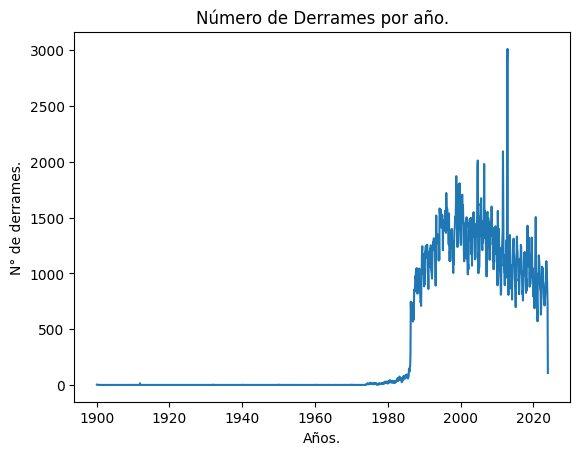

In [28]:



fig,ax = plt.subplots()
ax.plot(df_spill_3.resample('M').size())
ax.set_title('Número de Derrames por año.')
ax.set_xlabel('Años.')
ax.set_ylabel('N° de derrames.')

### **¿Cuales son las fuentes con mayor numero de derrames?**
##### En lógico pensar que la fuente con mayor número derrames son los provenientes de la industria petrolera. 

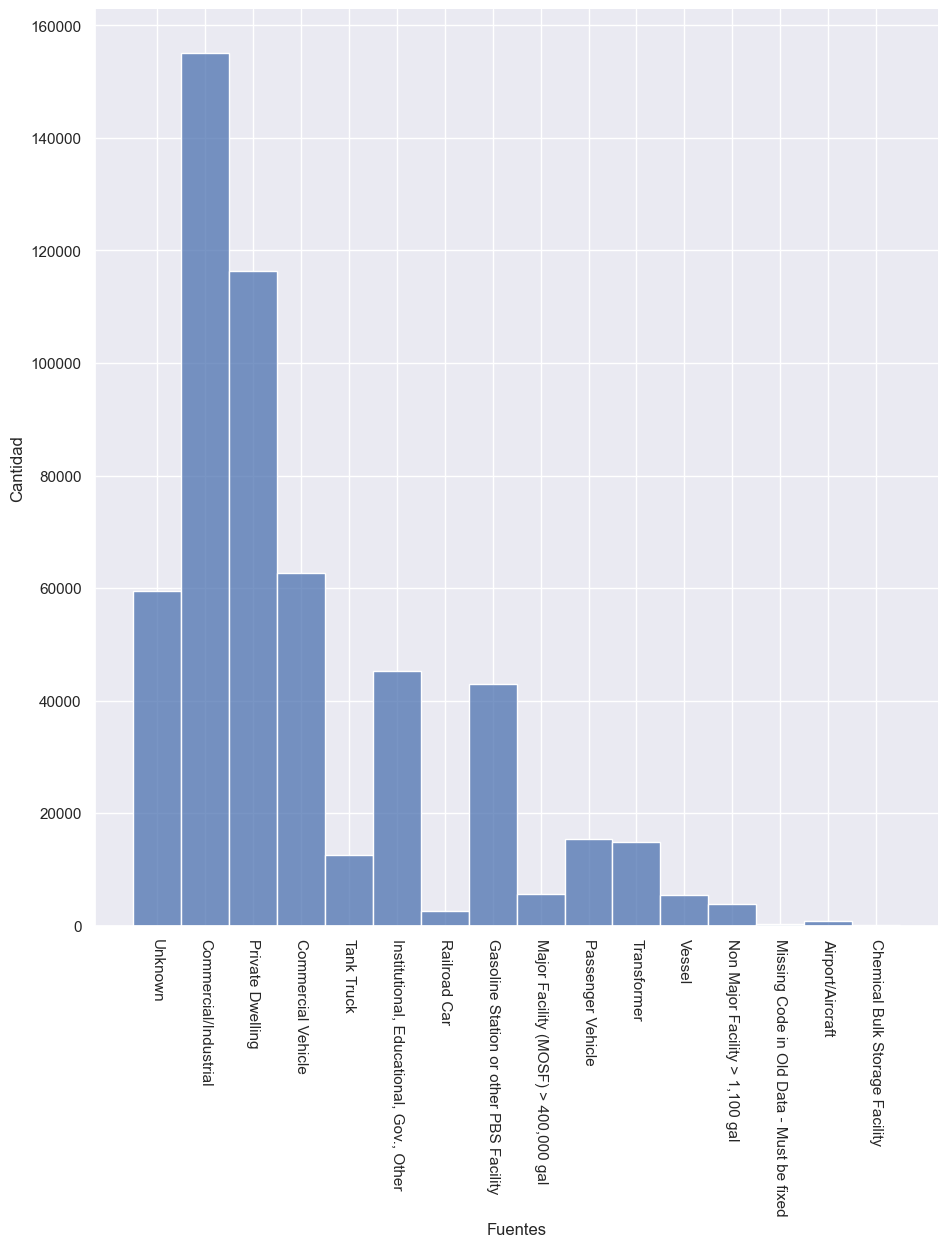

In [30]:
# 
sns.set_theme(style='darkgrid')
ax = sns.displot(data = df_spill_3, x = 'Source',height=10)
ax.set_xticklabels(rotation=270)
ax.set_titles("Fuentes con mayor número de derrames")
ax.set_xlabels("Fuentes")
ax.set_ylabels("Cantidad")


### **¿ Cuales fueron los mayores factores de contribución?**
##### Los mayores factores de constribución al derrame de petróleo es el equipamento utilizado para la extracción del crudo.

Text(0, 0.5, 'Cantidad')

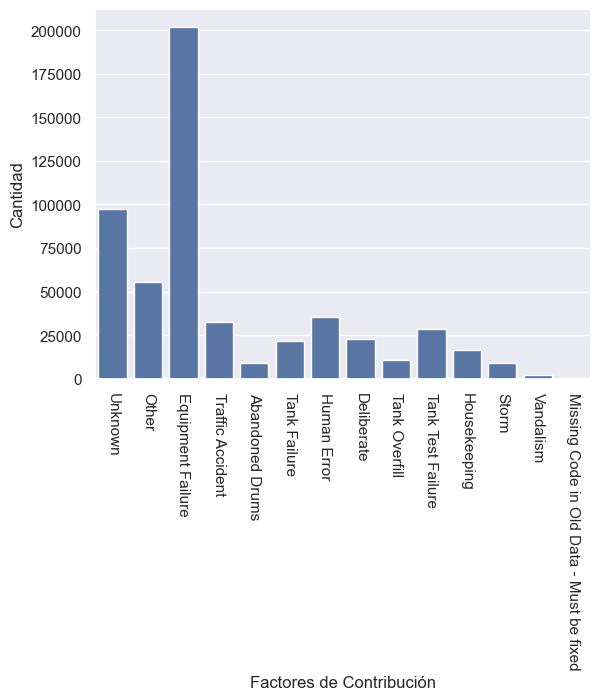

In [32]:
# 
sns.set_theme(style='darkgrid')
ax = sns.countplot(data = df_spill_3, x = 'Contributing Factor')
plt.xticks(rotation=270)
ax.set_xlabel("Factores de Contribución")
ax.set_ylabel("Cantidad")

### **¿Qué tipo de materiales se reciclan y en cuanta cantidad?**
##### Aquí puede observarse que los materiales que más se reciclan son "otros". Queda para invertircar a qué hace referencia el autor con "Other". Pero lo más importante aquí es ¿cómo se tratan los materiales derivados del petróleo en desuso?, sin impactar de forma negativa con el medio ambiente.

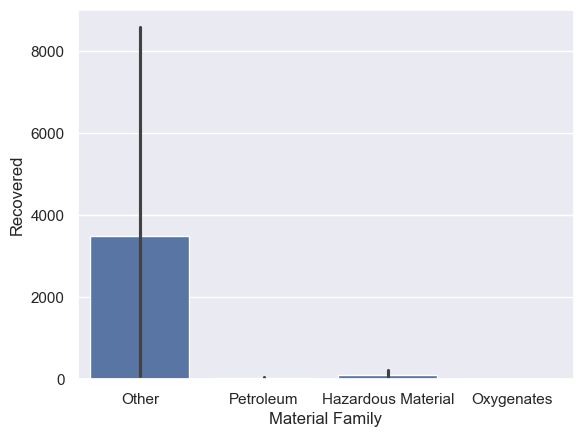

In [40]:
sns.set_theme(style='darkgrid')
ax = sns.barplot(data = df_spill_2, x = 'Material Family', y = 'Recovered')

#### En base a los observado, concluyo que los incidentes por derrame son mayores en este último siglo. Además, se observa que la industria que mayor derrame han generado es la industria del petróleo debido a los equipos defectuosos que liberan dichas sustancias al medio ambiente. Por último, observo que la mayor cantidad de materiales reciclados no son los de la industria del petróleo propiamente, sino otros. Por lo que me hace establecer la siguiente pregunta: "¿Cómo se tratan los materiales provenientes del petróleo? ¿Dondé se liberan estos derrames?"